In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
dem_candidates = pd.read_csv('../datasets/dem_candidates.csv')
dem_candidates.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [45]:
endorsement_cols = dem_candidates.columns[pd.Series(dem_candidates.columns).str.contains('Endorsed')]
dem_candidates[endorsement_cols] = dem_candidates[endorsement_cols].fillna(0)
dem_candidates[endorsement_cols] = dem_candidates[endorsement_cols].replace({'No': 0, 'Yes': 1})
dem_candidates['Total Endorsements'] = dem_candidates[endorsement_cols].sum(1)

# EDA

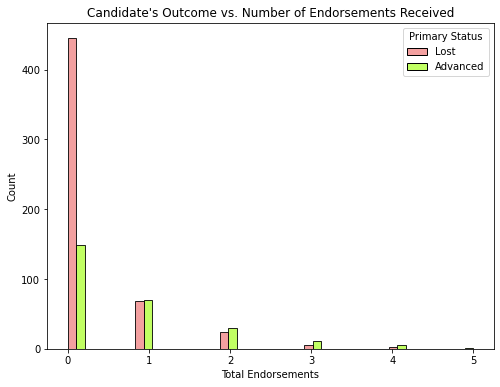

In [72]:
plt.figure(figsize=(8, 6))
colours = {'Lost': 'lightcoral', 'Advanced': 'greenyellow'}
sns.histplot(x = 'Total Endorsements', hue = 'Primary Status', 
             multiple = 'dodge', palette = colours, data = dem_candidates)
plt.title("Candidate's Outcome vs. Number of Endorsements Received");